In [4]:
import sklearn

In [174]:
import pandas as pd
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

In [185]:
X, y = make_classification(n_samples=100, n_features=12, n_redundant=3, random_state=42)
df = pd.DataFrame(X, y)

In [186]:
base_clf = GaussianNB()
# base_clf.fit(X, y)

calibrated_clf = CalibratedClassifierCV(base_estimator=base_clf, cv=5)
calibrated_clf.fit(X, y)


base_clf.fit(X, y)

calibratedpf_clf = CalibratedClassifierCV(base_estimator=base_clf, cv="prefit")

calibratedpf_clf.fit(X, y)

CalibratedClassifierCV(base_estimator=GaussianNB(), cv='prefit')

In [199]:
df = pd.DataFrame(X, y)

df["base_proba_1"] = base_clf.predict_proba(X)[:, 1]
df["rank_base"] = df["base_proba_1"].rank()

df["cbase_proba_1"] = calibrated_clf.predict_proba(X)[:, 1]
df["rank_cal"] = df["cbase_proba_1"].rank()

# df["cpfbase_proba_1"] = calibratedpf_clf.predict_proba(X)[:,1]

df = df.reset_index().rename(columns={"index": "label"})
df["check"] = df["rank_base"] - df["rank_cal"]
df.sample(10)

,label,0,1,2,3,4,5,6,7,8,9,10,11,base_proba_1,rank_base,cbase_proba_1,rank_cal,check
22,1,0.270457,-0.863991,0.573192,-0.050238,-0.238948,-1.735980,0.048522,0.368436,-0.830950,0.068456,-1.409672,-0.907564,0.950747,57.0,0.872149,57.0,0.0
93,1,1.006293,0.047399,0.383007,-0.576892,0.835692,-0.427958,-0.860413,-1.342023,-0.384556,1.560704,-1.601160,-1.129707,0.999999,93.0,0.893179,95.0,-2.0
32,1,-0.530869,-0.016423,0.014432,-0.489439,1.044161,-0.117087,1.188393,0.168481,2.526932,-0.150138,0.030589,0.681891,0.190136,48.0,0.230908,48.0,0.0
49,1,0.681501,-1.081057,-0.324227,0.028318,0.029756,1.741477,1.053153,-1.856268,-0.039555,1.533138,0.113407,0.938284,0.999898,77.0,0.893049,72.0,5.0
67,1,0.429618,0.459180,-0.305604,0.207688,0.271579,1.359706,-0.070166,-1.138369,-1.660961,0.861991,0.360617,-1.276749,0.991437,59.0,0.888504,59.0,0.0
27,0,-1.280429,-1.408461,-0.560354,1.754794,-2.081929,1.569317,-1.556629,-0.082944,0.606010,-0.331376,1.493174,1.696456,0.000913,41.0,0.099610,41.0,0.0
12,1,1.189017,-0.623141,-0.226218,1.420504,-0.570746,1.027032,-0.555477,-0.887211,-0.637387,0.680573,0.248446,-0.832356,0.987925,58.0,0.887211,58.0,0.0
2,0,0.624120,-1.214189,0.150189,0.628346,-0.012247,-0.724280,1.158111,0.681065,0.791663,-0.539630,-0.126747,-0.897254,0.011733,45.0,0.104246,45.0,0.0
65,0,1.305479,1.098777,0.338001,0.021004,0.681953,-1.720671,0.825416,1.729473,0.813510,-1.402101,-0.203586,-0.310267,0.000002,24.0,0.099183,26.0,-2.0
88,0,-1.503143,-0.335785,-0.560126,-0.245743,-0.272724,1.560103,1.669022,-0.064308,-0.259591,-0.348985,1.500285,-2.696887,0.002126,42.0,0.100487,42.0,0.0


,bin,mean
0,0,0.067270
1,1,0.295837
2,2,0.348384
3,3,0.406849
4,4,0.444311
5,5,0.496364
6,6,0.523086
7,7,0.575118
8,8,0.639863
9,9,0.903567


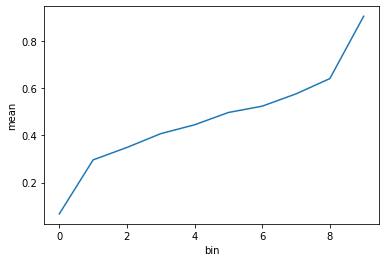

In [183]:
def plot_calibration(df):
    df["bin"] = pd.cut(df["base_proba_1"], 10, labels=False)
    df_count = df.groupby("bin").label.agg(["mean"]).reset_index()
    sns.lineplot(data=df_count, x="bin", y="mean")
    return df_count


plot_calibration(df)